# Exploratory Data Analysis - Retail 

#### Perform "Exploratory Data Analysis" on dataset SampleSuperstore.  As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data? 

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Dell/Downloads/SampleSuperstore.csv/SampleSuperstore.csv')  #loading dataset
df.head()    #displaying top 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape  # displaying the shape of the dataset

(9994, 13)

In [4]:
df.describe()   # display summary statistics

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.duplicated().sum()  # displaying the sum of duplicated values if there are any

17

In [6]:
df.nunique()    #displaying the count of unique values of all columns

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df['Postal Code'] = df['Postal Code'].astype('object')  

In [8]:
df.drop_duplicates(subset=None,keep='first',inplace=True) #dropping duplicate values 
df.duplicated().sum()

0

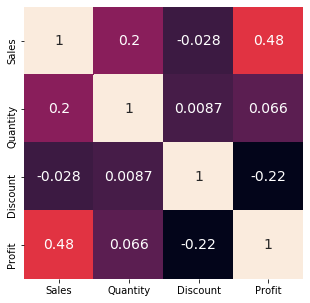

In [9]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()      #displaying heatmap of correlation between every column.

# Observations
There exists a correlation between sales and profit.

In [10]:
df = df.drop(['Postal Code'],axis = 1) #dropping postal code column from the dataframe.

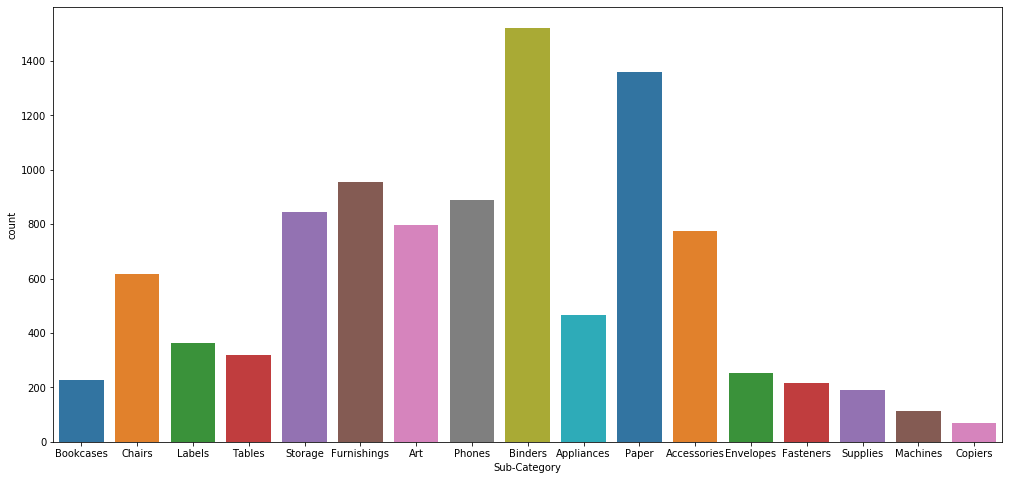

In [11]:
plt.figure(figsize=(17,8))
sns.countplot(x='Sub-Category',data=df,palette='tab10') #displaying countplot of all sub-categories within categories.


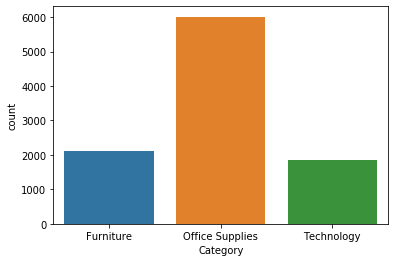

In [12]:
sns.countplot(x='Category',data=df,palette='tab10')   #displaying countplot of all categories present in the dataframe.

# Observations
Office Supplies have the maximum count

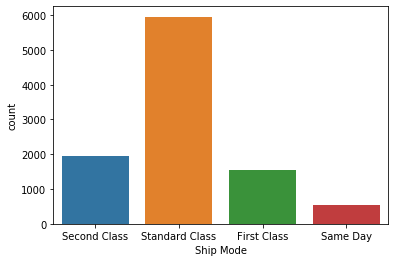

In [13]:
sns.countplot(x=df['Ship Mode'])      # displaying countplot of Ship Mode column.

# Observations
Standard Class in Ship Mode has the maximum count.

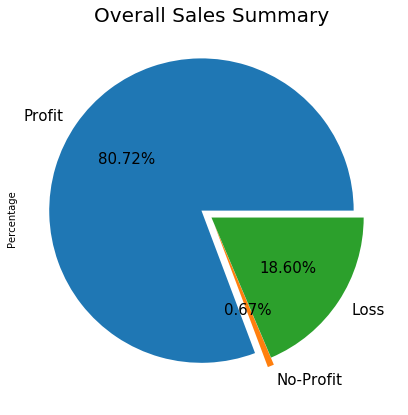

In [14]:
summary = pd.DataFrame({'Profit':df.Quantity[df.Profit > 0].sum(), 
                        'No-Profit':df.Quantity[df.Profit == 0].sum(), 
                        'Loss':df.Quantity[(df.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=False, explode=(0.08,0.05,0))
plt.show()  #displaying sales summary by profit, loss and no-profit

# Observations
80.72% of sales resulted in profit and 18.60% of sales result in loss

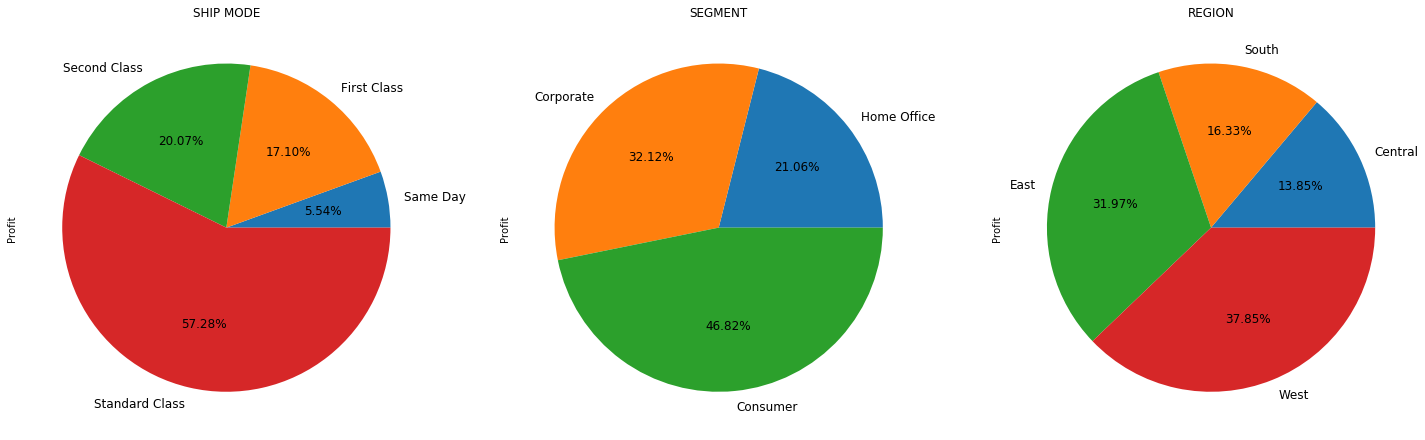

In [15]:
# Plotting Shipmode, Segment, and Region-wise profit
prof_S = pd.DataFrame(df.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(df.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(df.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(25,12))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[2])

plt.show() #displaying ShipMode, Segment and Region wise sales summary by profit.

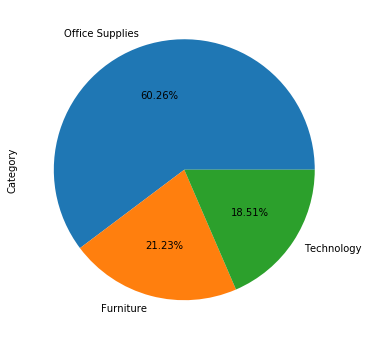

In [16]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()   #displaying percentage counts by category.

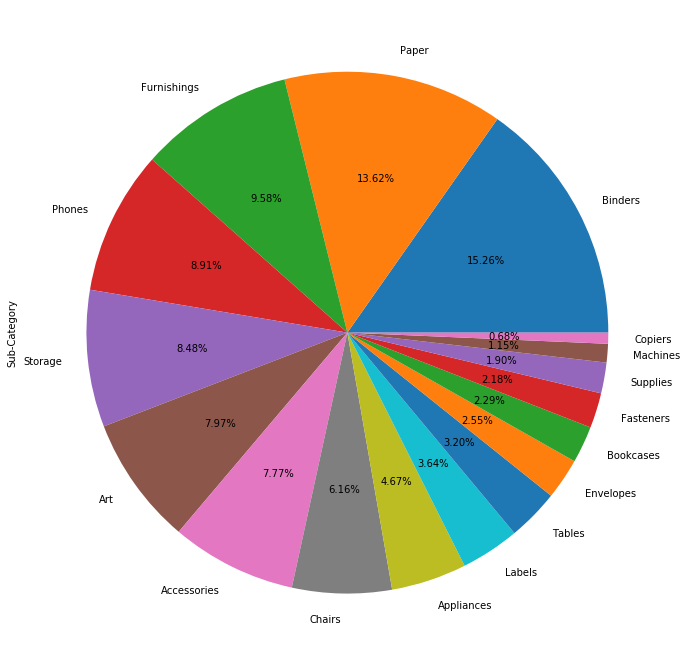

In [17]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()   # displaying percentage counts by sub-category within our categories Furniture, Technology and Office Supplies.

# Observations
Maximum sales can be seen for Binders,Papers and Furnishings with 15.26%, 13.62%, 9.58% respectively.
Minimum sales can be seen for Copiers and Machines with 0.68% and 1.15% respectively.

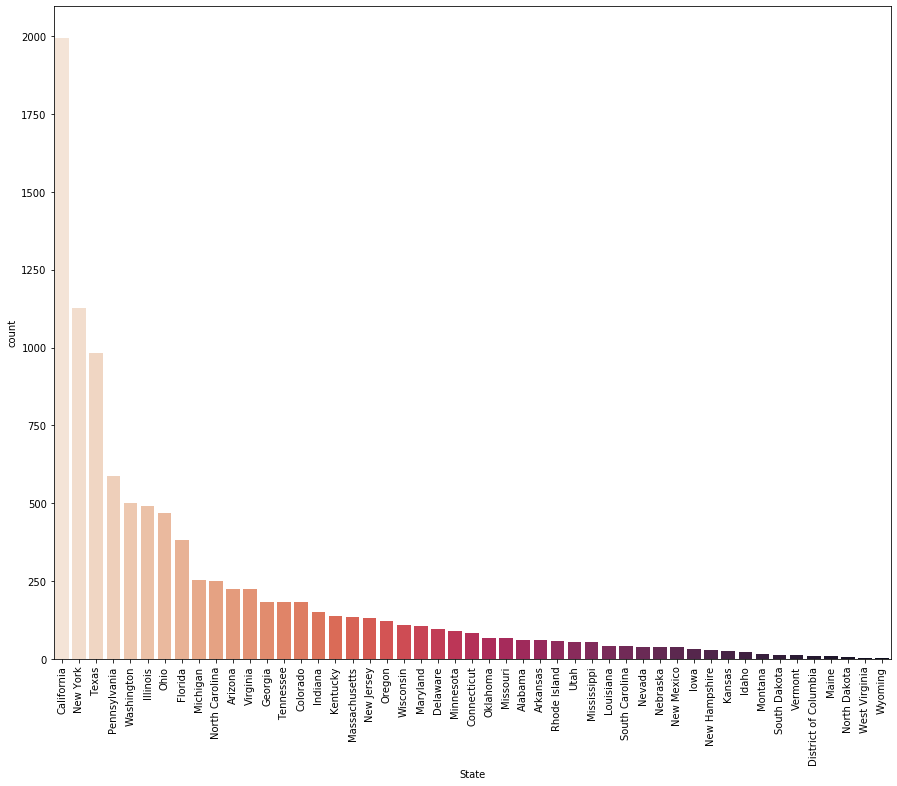

In [18]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()  # Displaying countplot in the order of maximum counts of State.

# Observations
Maximum number of buyers are from California and New York.

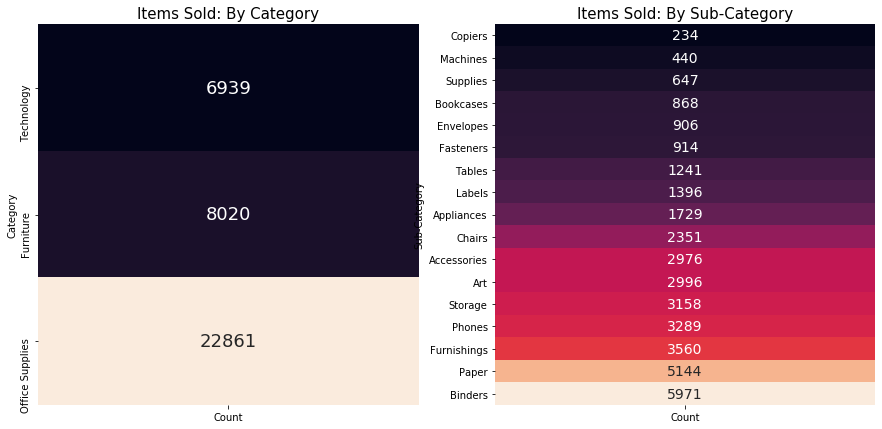

In [19]:
cat = df.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = df.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, fmt='2', annot_kws={'size':18})
sns.heatmap(sub, ax=ax[1], annot=True, cbar=False, fmt='2',  annot_kws={'size':14})
plt.show() # display count of items sold by Category 
plt.show() # display count of items sold by Sub-category

# Observations
Maximum items are sold from the category of Office Supplies

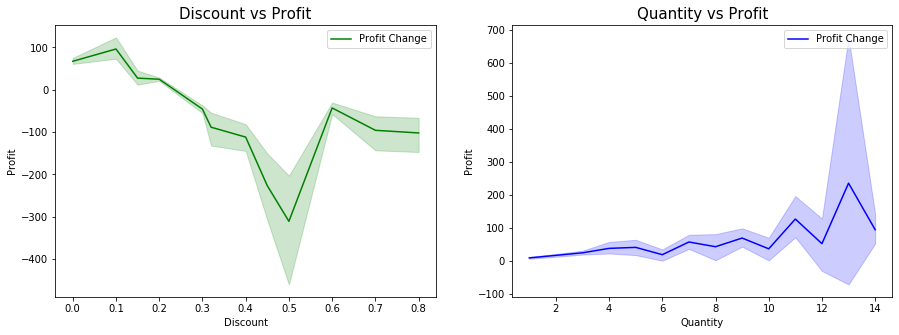

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)
sns.lineplot(df.Discount, df.Profit, color='green', label='Profit Change', ax=ax[0])
sns.lineplot(df.Quantity, df.Profit, color='blue', label='Profit Change', ax=ax[1])
plt.show() # display discount vs Profit and Quantity vs Profit

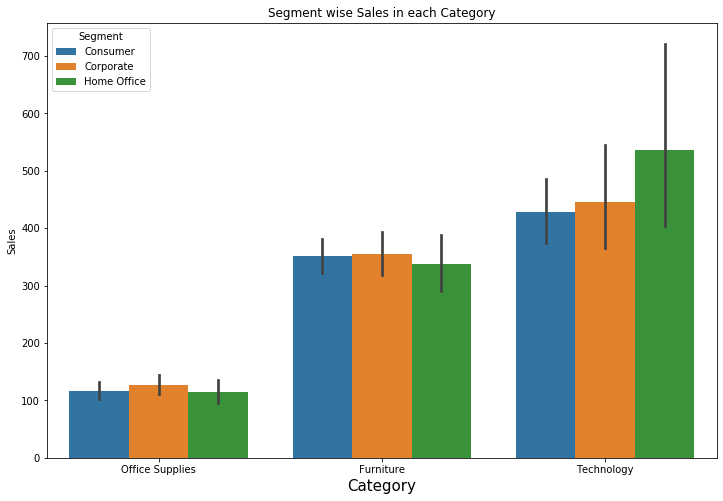

In [20]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Category')
sns.barplot(x='Category',y='Sales',data=df,hue='Segment',order=df['Category'].value_counts().index)
plt.xlabel('Category',fontsize=15)
plt.show() # display segment wise sales in each category

# Observations
Segment wise sales in each category is found to be the highest in Technology, Home Office supplies has the maximum sales

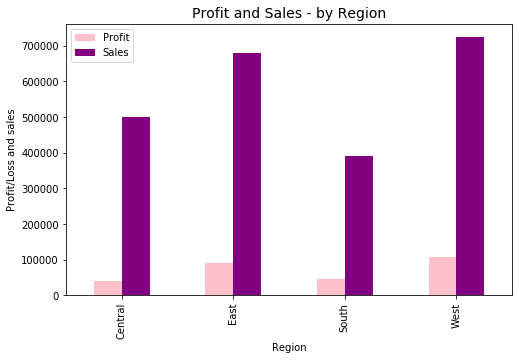

In [21]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['pink','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.title('Profit and Sales - by Region', fontsize=14)
plt.show() #displaying profit and sales in each region

# Observations
Profit and sales are maximum in West and minimum in South region

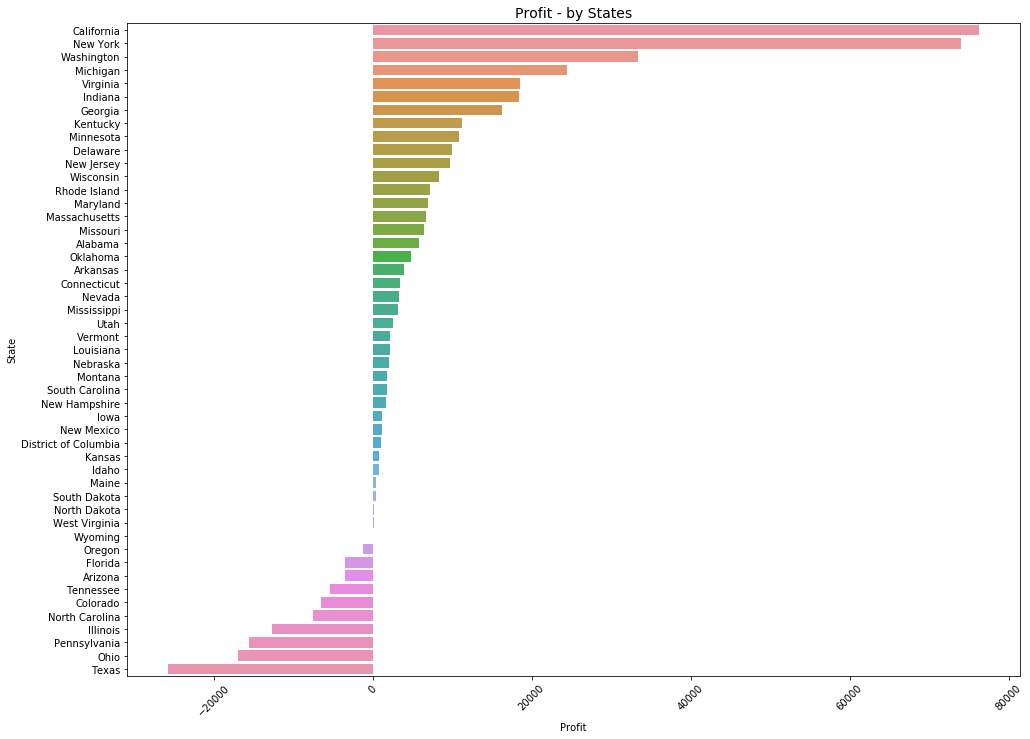

In [22]:
sub = np.round(df.groupby('State').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(16,12))
plt.title('Profit - by States', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=45)
plt.show() #displaying profit by States

# Observations
Maximum profit is seen in states like California and NewYork.
Maximum loss is reported in Texas, Ohio and Pennsylvania.

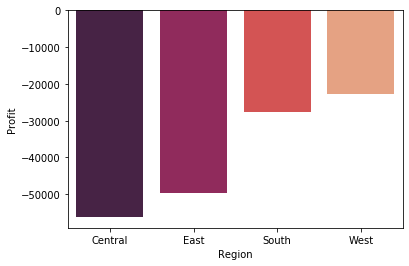

In [23]:
loss = np.round(df[-(df.Profit) > 0], decimals=2).sort_values('Profit')
reg_loss = loss.groupby('Region').sum()
sns.barplot(reg_loss.index, reg_loss.Profit, palette='rocket')
plt.show() #displaying loss in eacg region.

# Observations
Maximum loss can be seen in Central region as compared to other regions.

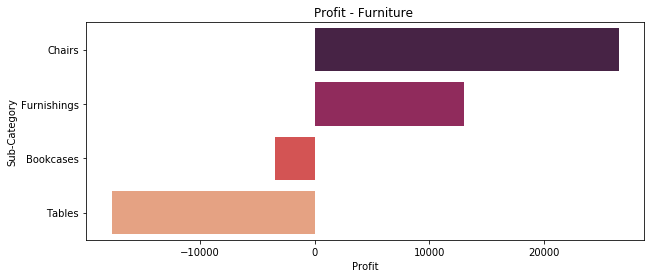

In [24]:
furn = df[df.Category == 'Furniture'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Furniture ')
sns.barplot( furn.Profit, furn.index,palette='rocket')
plt.show()  #displaying profit/loss in each subcategory of Furniture

# Observations
Sales of Chairs and Furnishings from Furniture category are able to gain profits whereas tables and bookcases have resulted in loss.

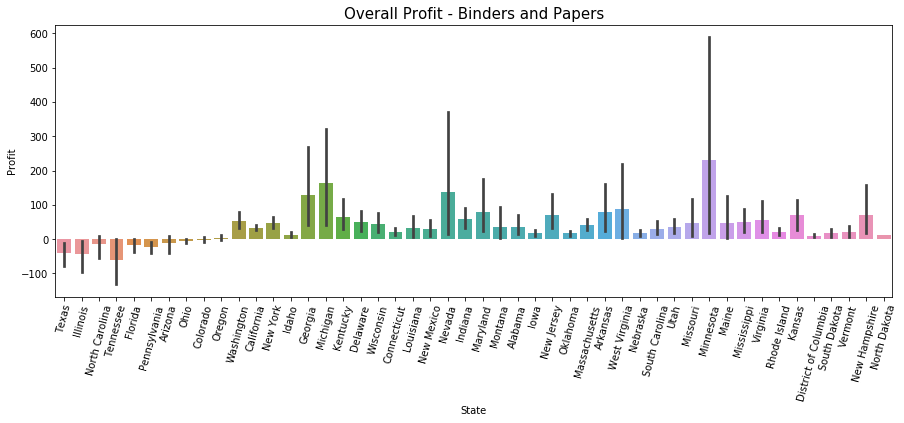

In [25]:
fc = df[(df['Sub-Category'] == 'Binders') | (df['Sub-Category'] == 'Paper')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Overall Profit - Binders and Papers', fontsize=15)
sns.barplot(fc['State'], fc.Profit)
plt.xticks(rotation=75)
plt.show()  # displaying profit/loss of Binders and Papers in each State

# Observations
Sales of Binders and Papers face loss in the states of Texas, Illinois and Tennessee

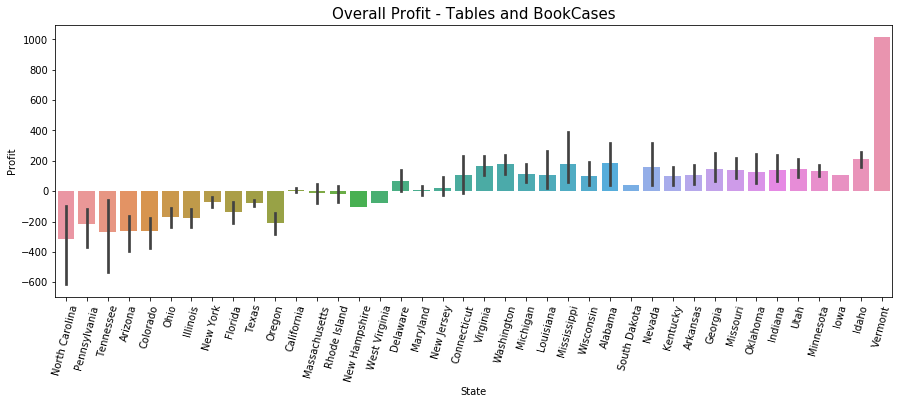

In [26]:
fc = df[(df['Sub-Category'] == 'Tables') | (df['Sub-Category'] == 'Bookcases')].sort_values('Profit')
plt.figure(figsize=(15,5))
plt.title('Overall Profit - Tables and BookCases', fontsize=15)
sns.barplot(fc['State'], fc.Profit)
plt.xticks(rotation=75)
plt.show() # displaying profit/loss of Tables and BookCases in each State

# Observations
Maximum profit of sales of Tables and BookCases are reported in Vermont

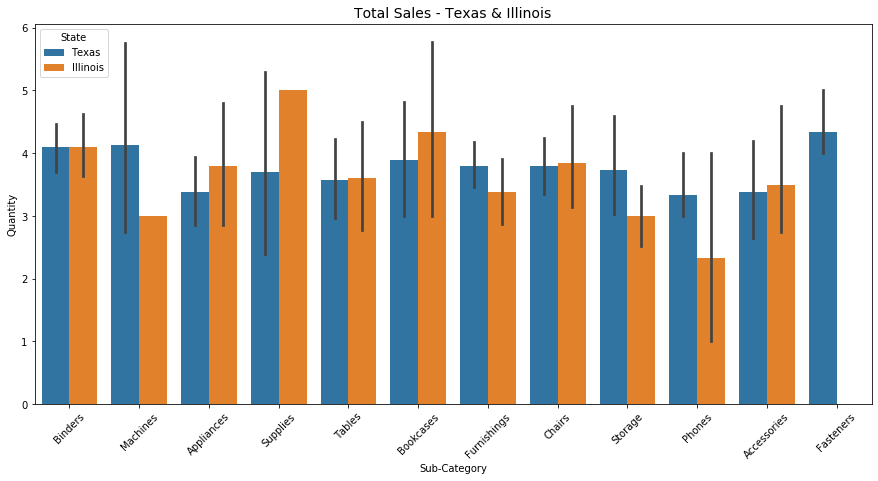

In [27]:
# Plotting Central Region Sales Loss
central = loss[loss.Region == 'Central']
plt.figure(figsize=(15,7))
plt.title('Total Sales - Texas & Illinois', fontsize=14)
sns.barplot(central['Sub-Category'], central['Quantity'], hue=central['State'])
plt.xticks(rotation=45)
plt.show() #displaying total sales of each Sub-Category in Texas and Illinois

# Observations
Illinois has maximum quantity of Supplies and Texas has maximum quantity of Fasteners.
 

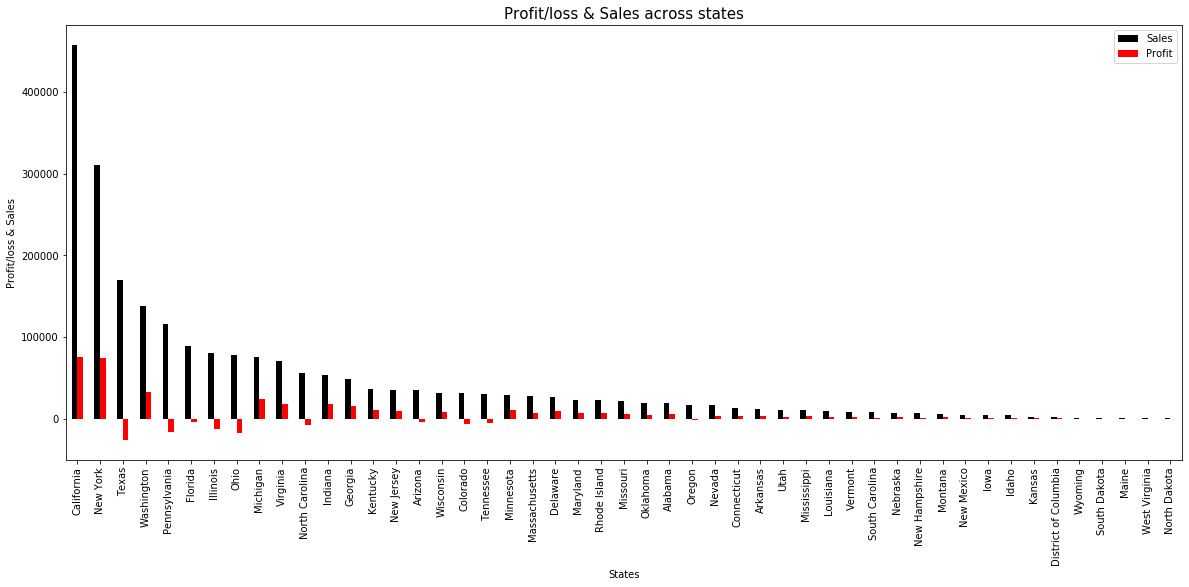

In [28]:

ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['black','red'],figsize=(20,8))
plt.title('Profit/loss & Sales across states',  fontsize=15)
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show() #displaying Profit/loss and Sales across each state

# Observations
Maximum Sales have been made to California and NewYork and these sales have resulted in quite good profit.

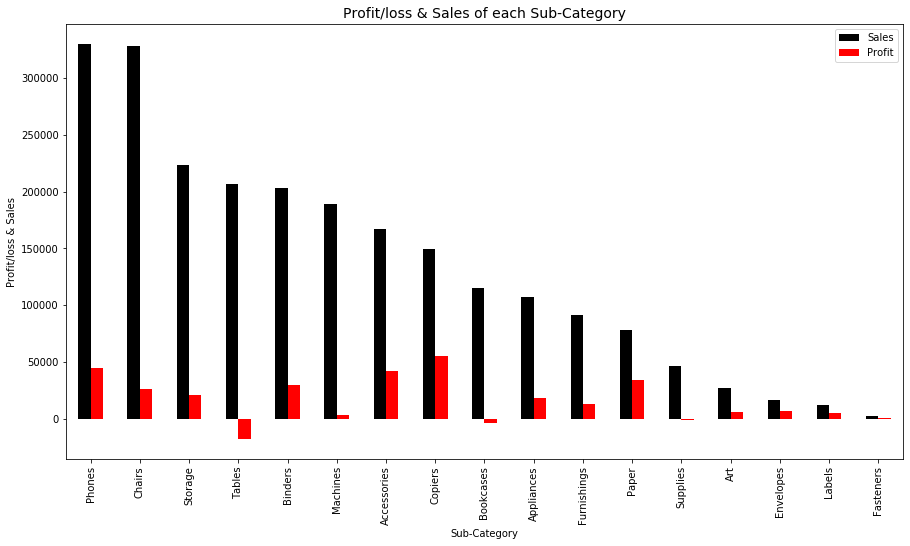

In [29]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['black','red'],figsize=(15,8))
plt.title('Profit/loss & Sales of each Sub-Category', fontsize=14)
plt.xlabel('Sub-Category') 
plt.ylabel('Profit/loss & Sales')
plt.show() # display Profit/loss and sales of each Sub-Category

# Observations
Phones and Chairs have the highest sales whereas Copier has the highest profit as compared to other sales.
Tables and Bookcases face loss in profit.

# FINDINGS
* Sales of Tables and BookCases must be minimized in North Carolina, Tennesse, Arizona and Colorado because they result in Loss.
* Supply of Tables and BookCases result in overloss loss so their supply should be minimized.
* Maximum profit is seen in sales to the states of California and NewYork.
* Central region facing loss in sales as compared to other regions.
* Maximum items are sold from the category of Papers and Binders.
* Sales of Technology related items are the highest.
* Between 0% and 10% discount, the profit is maximum.
* At 50% discount, the profit is minimum.
* As quantity of product increases, Profit increases.